# Startup Transformation
In this project, we’ll work as a data analyst for a tech startup that is looking to improve its operations after a global pandemic has taken the world by storm.

We will apply data transformation techniques to make better sense of the company’s data and help answer important questions such as:

- Is the company in good financial health?
- Does the company need to let go of any employees?
- Should the company allow employees to work from home permanently?
  
Let’s get started!

In [1]:
#Import libraries 
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## Analyzing Revenue And Expenses 

The management team of the company we work for is concerned about the status of the company after a global pandemic.

The CFO (Chief Financial Officer) asks us to perform some data analysis on the past six months of the company’s financial data, which has been loaded in the variable financial_data.

In [2]:
# load in financial data
financial_data = pd.read_csv('financial_data.csv')
print(financial_data.head())

   Month  Revenue  Expenses
0      1  1420000    510000
1      2  1200000    532000
2      3  1050000    551000
3      4   920000    612000
4      5   807000    628000



Notice that financial_data has three columns – Month, Revenue, and Expenses.

Let's store each column in three separate variables called month, revenue, and expenses.

In [3]:
month = financial_data['Month']
revenue = financial_data['Revenue']
expenses = financial_data['Expenses']

Let's plot the revenue over the last six months to see where we're heading: 

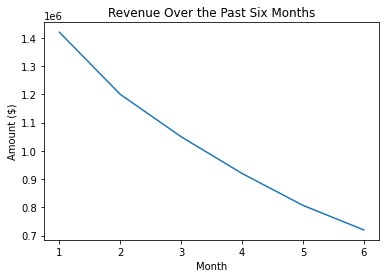

In [4]:
plt.plot(month, revenue)
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.title('Revenue Over the Past Six Months')
plt.show()

**Result:** Over the past six months the revenue has fallen from $$1,420,000 to $807,000

Let's now plot the expenses over the past six months 

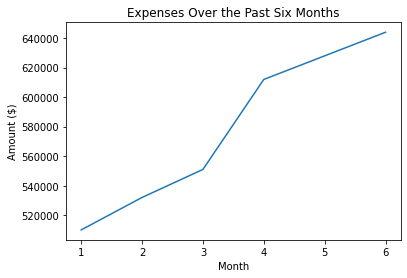

In [5]:
plt.clf()
plt.plot(month, expenses)
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.title('Expenses Over the Past Six Months')
plt.show()

**Results:** Our expense have risen up from $510,000 to 628,000

## Pie Chart and Collapsing Categories
As shown, revenue seems to be quickly decreasing while expenses are increasing. If the current trend continues, expenses will soon surpass revenues, putting the company at risk.

After we show this chart to the management team, they are alarmed. They conclude that expenses must be cut immediately and give us a new file to analyze called expenses.csv.

Let's load it and print it out. 

In [6]:
expense_overview = pd.read_csv('expenses.csv')
print(expense_overview)

       Expense  Proportion
0     Salaries        0.62
1  Advertising        0.15
2  Office Rent        0.15
3    Equipment        0.03
4    Utilities        0.03
5      Supples        0.01
6         Food        0.01


Notice that there are two columns:

- **Expense:** indicates the expense category
- **Proportion:** indicates how much of the overall expenses a specific category takes up
  
Let's store the Expense column in a variable called expense_categories and the Proportion column in a variable called proportions.

**Note:** The categories of Equipment, Utilities, Supplies and Food, since they are small compared to the others, we are putting them in a single category with the name of others. 

In [7]:
expense_categories = ['Salaries', 'Advertising', 'Office Rent', 'Other']
proportions = [0.62, 0.15, 0.15, 0.08]

Let's graph our columns in a pie chart to visualize it better 

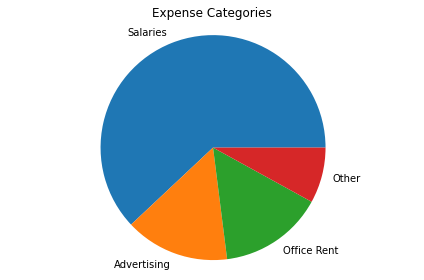

In [8]:
plt.clf()
plt.pie(proportions, labels = expense_categories)
plt.title('Expense Categories')
plt.axis('Equal')
plt.tight_layout()
plt.show()

It seems that Salaries, Advertising, and Office Rent make up most of the expenses, while the rest of the categories make up a small percentage. This simplified pie chart helps the management team see a big picture view of the company’s expenses without getting distracted by noisy data.

**Results:** If the company wants to cut costs in a big way, the category we should focus on is the salary one. 

## Employee Productivity 
Salaries make up 62% of expenses. The management team determines that to cut costs in a meaningful way, they must let go of some employees.

Each employee at the company is assigned a productivity score based on their work. The management would like to keep the most highly productive employees and let go of the least productive employees.

First, let's load the data and print it to see what it is all about. 

In [9]:
employees = pd.read_csv('employees.csv')
print(employees.head())

                Name  Salary  Productivity  Commute Time
0     Mason Pender     87902         29.91         16.79
1          Mia Rew     95672         49.91         44.48
2   Jalisa Kroenke    177864         78.00         19.40
3  Krystal Homeyer    186643         24.36         42.06
4    Kiana Wishart    167148          4.08         25.58


We notice that there is a Productivity column, which indicates the productivity score assigned to that employee.

Let's sort the employees' data frame (in ascending order) by the Productivity column and store the result in a variable called sorted_productivity.

In [10]:
sorted_productivity = employees.sort_values(by=['Productivity'])
print(sorted_productivity)

                  Name  Salary  Productivity  Commute Time
259       Wilber Rye    111647          0.06         49.42
92    Fredric Gandee    154469          0.24         22.48
252  Johnson Fordham    168684          1.46         22.39
178    Lilia Lemoine    167579          1.67         27.36
162   Hilma Laughton     85506          1.79         36.41
..                 ...     ...           ...           ...
164      Miki Hartle     50856         99.54         31.39
88        Darell Nau     30530         99.63         44.25
23    Joaquina Neece     95562         99.66         48.65
202    Janae Officer    110139         99.69         15.45
6    Jacinta Dunford    130968         99.98         44.53

[300 rows x 4 columns]


We should now see the employees with the lowest productivity scores at the top of the data frame. The company decides to let go of the 100 least productive employees. 

Let's store the first 100 rows of sorted_productivity in a new variable called employees_cut and print out the result.

Unfortunately, this batch of employees won’t be so lucky.

In [11]:
employees_cut = sorted_productivity.head(100)
print(employees_cut)

                       Name  Salary  Productivity  Commute Time
259            Wilber Rye    111647          0.06         49.42
92         Fredric Gandee    154469          0.24         22.48
252       Johnson Fordham    168684          1.46         22.39
178         Lilia Lemoine    167579          1.67         27.36
162        Hilma Laughton     85506          1.79         36.41
..                      ...     ...           ...           ...
43   Bernardo Klingenberg     55464         34.52         32.27
186        Ashleigh Istre    178627         34.70         38.67
288       Penni Kimbrough    142680         35.21         49.64
269      Margot Mackenzie    114302         35.79         19.87
218        Quinn Frampton     44000         36.36         34.12

[100 rows x 4 columns]


## Commute Times and Log Transformation
The COO (Chief Operating Officer) is debating whether to allow employees to continue to work from home post-pandemic. He first wants to take a look at roughly how long the average commute time is for employees at the company. He asks for out help to analyze this data.

The employees data frame has a column called Commute Time that stores the commute time (in minutes) for each employee. Let's create a variable called commute_times that stores the Commute Time column.

In [12]:
commute_times = sorted_productivity['Commute Time']


Let’s do some quick analysis on the commute times of employees.We'll be using print() and .describe() to print out descriptive statistics for commute_times.

**What are the average and median commute times?** It might be worth it for the company to explore allowing remote work indefinitely so employees can save time during the day.

In [13]:
print(commute_times.head())
print(commute_times.describe())

259    49.42
92     22.48
252    22.39
178    27.36
162    36.41
Name: Commute Time, dtype: float64
count    300.000000
mean      33.441700
std       16.128369
min        3.220000
25%       21.667500
50%       31.060000
75%       42.190000
max      101.780000
Name: Commute Time, dtype: float64


**Results:** The mean time for commute is 33 minutes and the median is 31 minutes but there is a max commute of 1 hour 41 minutes

Let's explore the histogram of the commute times to see more clearly our data

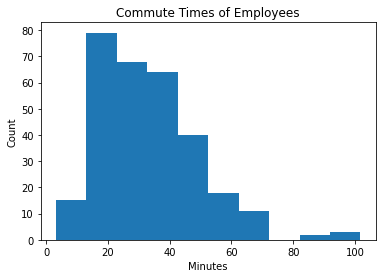

In [14]:
plt.clf()
plt.hist(commute_times)
plt.title('Commute Times of Employees')
plt.xlabel('Minutes')
plt.ylabel('Count')
plt.show()

The data seems to be skewed to the right. To make it more symmetrical, we might try applying a log transformation.

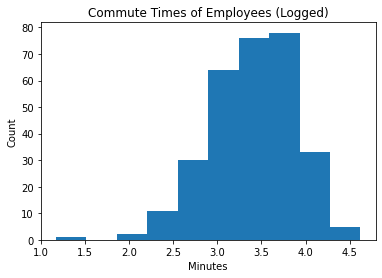

In [15]:
commute_times_log = np.log(commute_times)
plt.clf()
plt.hist(commute_times_log)
plt.title('Commute Times of Employees (Logged)')
plt.xlabel('Minutes')
plt.ylabel('Count')
plt.show()

Notice how the shape of the data changes from being right skewed to a more symmetrical (and even slightly left-skewed) in shape. After applying log transformation, the transformed data is more “normal” than before.